In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemini2p5flash"
prompt_approaches = os.listdir(base_output_dir)

Summary Metrics of all Prompting Appraches

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:612: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


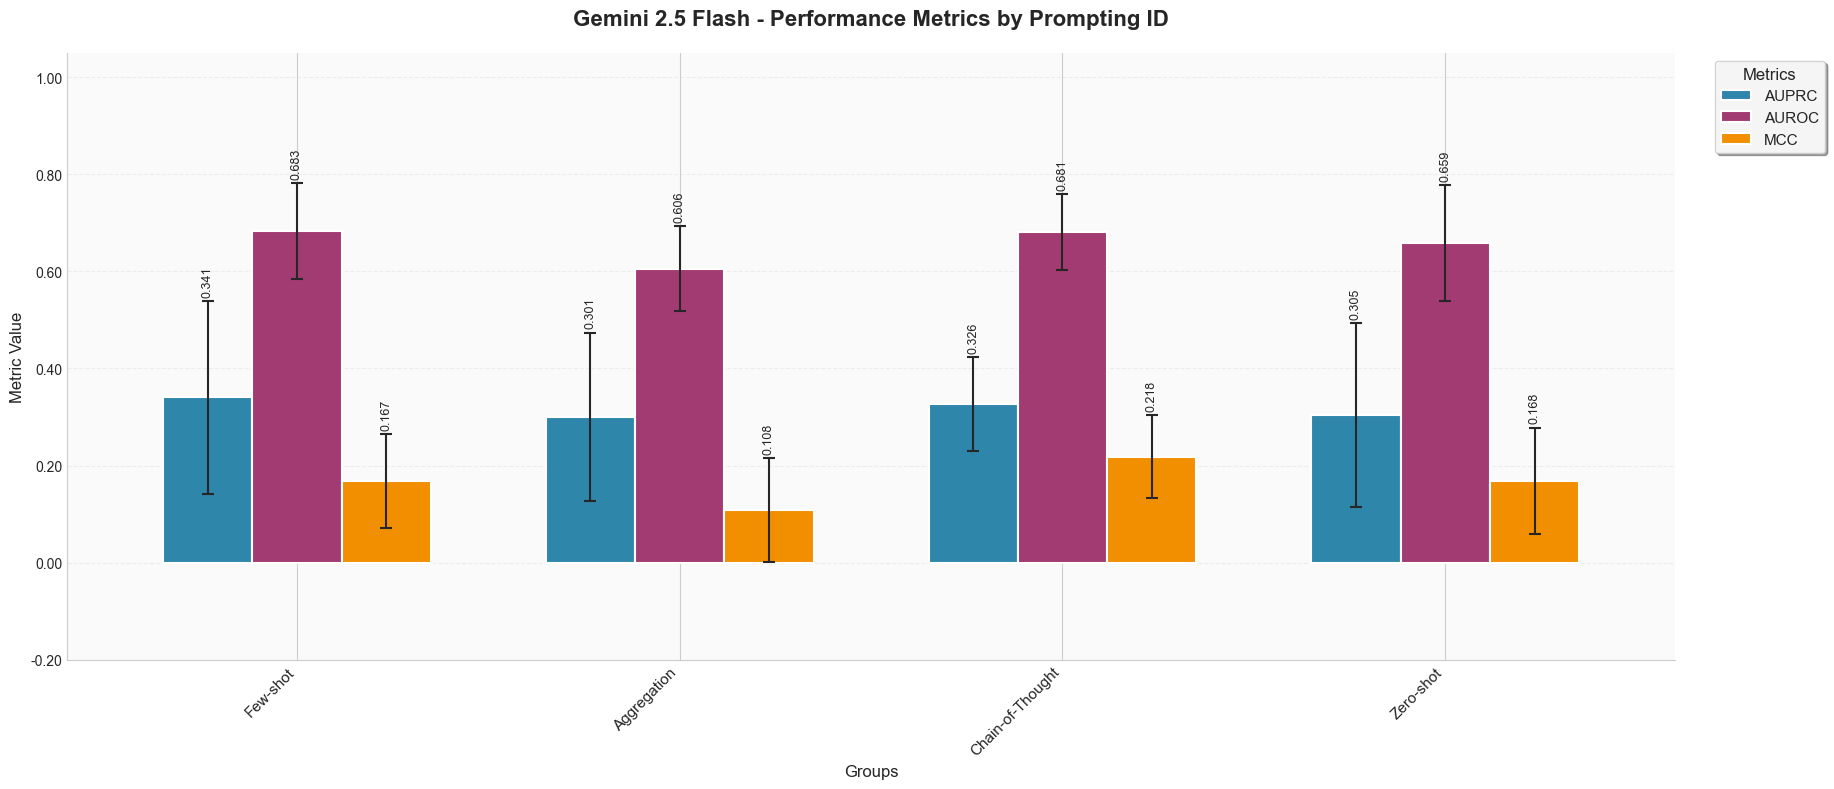

In [3]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(
    base_output_dir, prompt_approaches
)
LLMAnalyzer.plot_metrics(


    df_results, group=["prompting_id"], title_prefix="Gemini 2.5 Flash - "


)

Metrics per Prompt and Task

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:612: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


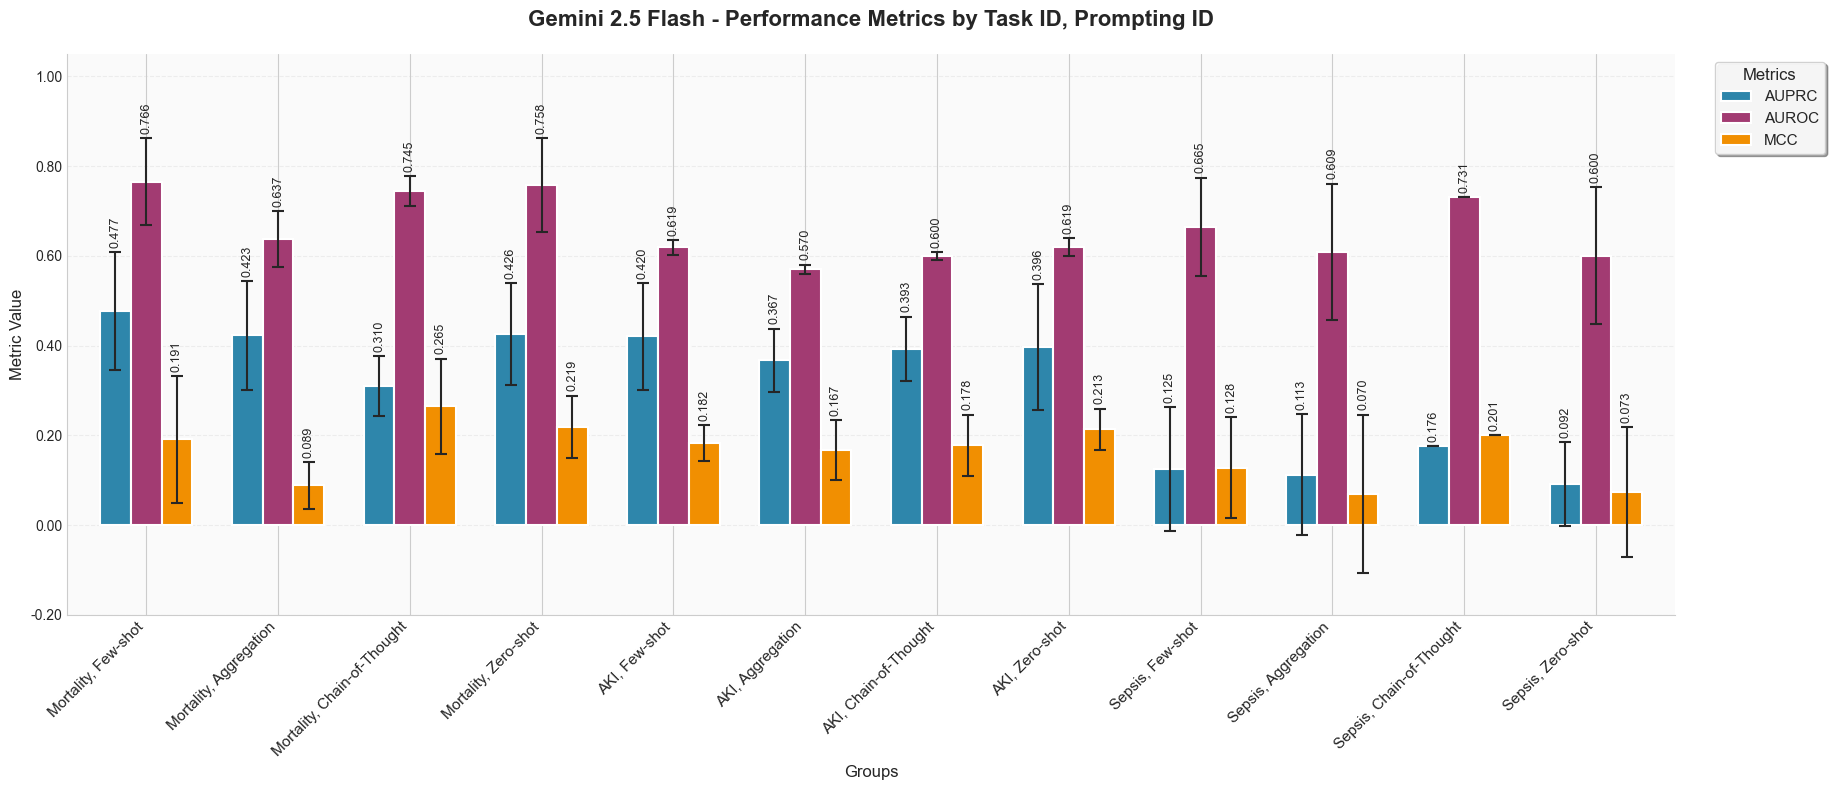

In [4]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="Gemini 2.5 Flash - ",
)

Analysis of best prompting approach

In [5]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=prompt_approaches[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('liu_2023_few_shot_preprocessor', 'sarvari_2024_aggregation_…

In [6]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemini2p5flash\liu_2023_few_shot_preprocessor
Model Name: Gemini2p5flash, Task: aki, Dataset: eicu, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: aki, Dataset: hirid, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: aki, Dataset: miiv, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: mortality, Dataset: eicu, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: mortality, Dataset: hirid, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: mortality, Dataset: miiv, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: sepsis, Dataset: eicu, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: sepsis, Dataset: hirid, Timestamp: 20250623_140022
Model Name: Gemini2p5flash, Task: sepsis, Dataset: miiv, Timestamp: 20250623_140022


In [7]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,2.75s,2703.15s,9010,8866155,128,126038,305,679,984,0.45
1,aki,hirid,1.84s,1806.64s,9964,9784235,112,109797,159,823,982,0.19
2,aki,miiv,1.86s,1833.72s,9100,8954791,120,117705,229,755,984,0.30
3,mortality,eicu,2.23s,222.84s,30493,3049349,125,12511,7,93,100,0.08
4,mortality,hirid,2.74s,273.80s,34755,3475511,145,14503,11,89,100,0.12
5,mortality,miiv,4.03s,403.40s,30507,3050680,114,11390,12,88,100,0.14
6,sepsis,eicu,3.54s,3466.62s,9121,8938234,151,148284,47,933,980,0.05
7,sepsis,hirid,2.60s,2516.43s,10108,9794475,151,146664,73,896,969,0.08
8,sepsis,miiv,1.89s,1867.99s,9063,8972646,138,136322,25,965,990,0.03
